# Open source for the win

Before we dive into our next challenge let's introduce you to the world of exciting open source software in the mobility ecosystem. 

We’re living in a golden age of open mobility technology. From geospatial tools like PostGIS to data like OpenStreetMap (OSM), there’s a wealth of resources that enrich the mobility ecosystem. Companies, cities, and enthusiasts collaborate to make amazing new applications and extend existing software.

#### Let's introduce to the exciting OSM and OSMnx software here.

`OpenStreetMap(OSM)` is a project that creates and distributes free geographic data for the world. In the community's own words - 'We started it because most maps you think of as free actually have legal or technical restrictions on their use, holding back people from using them in creative, productive, or unexpected ways.' 

`OSM` attributes the features that we see in a city like traffic light, coffee shops, road types etc to segments using tags that are parseable and readable by computers and data scientists. This is especially useful in mobility context when we make business decisions to maximes our profits and reachability.

`OSMnx` is a Python package that lets you download spatial geometries and model, project, visualize, and analyze street networks from OpenStreetMap's APIs. You can download and model walkable, drivable, or bikable urban networks with a single line of Python code, and then easily analyze and visualize them.

In [15]:
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

Since right now our services are only limited to the Manhattan area, lets use osmnx to fetch the city graph as a connected networkx graph, as below

In [16]:
G = ox.graph_from_place('Manhattan, New York City, New York, USA', network_type='drive')
print(type(G))

<class 'networkx.classes.multidigraph.MultiDiGraph'>


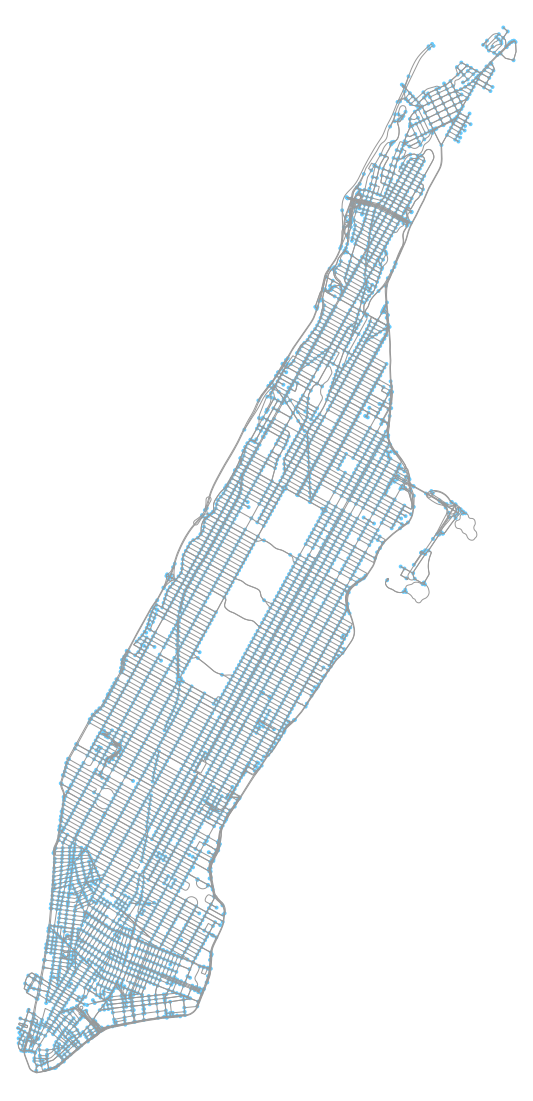

In [17]:
# Let's visualize the city graph here

fig, ax = ox.plot_graph(G, fig_height=20, fig_width=20, show=False, close=False)
plt.show()

Let's play around a little more and familiarize ourselves with this amazing software. 

In [18]:
nodes, edges = ox.graph_to_gdfs(G)

print(nodes.columns)
print(nodes[0:5])

print('''\n\nEach node in the graph is identified by an ID called the osmid. 
Every node is also associated with a lat lng (in the x and y columns here) that 
allows us to visualise its location in the city\n''')
print('Note that the feature traffic_signals indicates the presence of a traffic light at that node in the city\n\n')

Index(['y', 'x', 'osmid', 'highway', 'ref', 'geometry'], dtype='object')
                    y          x       osmid          highway  ref  \
1773060097  40.714061 -73.997594  1773060097  traffic_signals  NaN   
1773060099  40.713781 -73.998074  1773060099  traffic_signals  NaN   
6177439749  40.760252 -73.961501  6177439749  traffic_signals  NaN   
6177439750  40.763488 -73.969216  6177439750  traffic_signals  NaN   
6177439752  40.763580 -73.969437  6177439752  traffic_signals  NaN   

                              geometry  
1773060097  POINT (-73.99759 40.71406)  
1773060099  POINT (-73.99807 40.71378)  
6177439749  POINT (-73.96150 40.76025)  
6177439750  POINT (-73.96922 40.76349)  
6177439752  POINT (-73.96944 40.76358)  


Each node in the graph is identified by an ID called the osmid. 
Every node is also associated with a lat lng (in the x and y columns here) that 
allows us to visualise its location in the city

Note that the feature traffic_signals indicates the presence of

In [19]:
'''Given a GPS location we can also associate it with a node in the OSMnx graph. 
This is especially critical while making routing decisions from a location'''

def nearest_node(lat, lon):
    return ox.get_nearest_node(G, (lat, lon), method='haversine')

print(f'Node_id : {nearest_node(40.725892, -73.997058)} \n')
print(f'Corresponding node features : \n{nodes.loc[nearest_node(40.725892, -73.997058)]}')

Node_id : 42448552 

Corresponding node features : 
y                                  40.7259
x                                 -73.9976
osmid                             42448552
highway                    traffic_signals
ref                                    NaN
geometry    POINT (-73.9975736 40.7258712)
Name: 42448552, dtype: object


In [20]:
'''Similarly lets explore the edge attributes'''
print(edges[0:1])

print('''\n\nAs you can see, we get a few more interesting tid bits from the edge features. 
We can see which two nodes the egde connects, the corresponding OSM id of the edge, such as,
road type, street name, speed information, and length of the edge.\n\n''')

            u         v  key    osmid  oneway              name      highway  \
0  1773060097  42437559    0  5670536    True  Catherine Street  residential   

  maxspeed  length                                           geometry lanes  \
0   25 mph  11.237  LINESTRING (-73.99759 40.71406, -73.99749 40.7...   NaN   

  bridge  ref tunnel width access junction service  
0    NaN  NaN    NaN   NaN    NaN      NaN     NaN  


As you can see, we get a few more interesting tid bits from the edge features. 
We can see which two nodes the egde connects, the corresponding OSM id of the edge, such as,
road type, street name, speed information, and length of the edge.




Now that we have familiarized ourselves with `OSM` and `OSMnx`, lets dive back to the task we have at hand. 

# Docking stations

Hooray! The business is booming and you have enough savings to expand your taxi services. You acquire more autonomous taxis to serve more customers. To be able to reach different parts of the Manhattan area, it is logical for us to dock (park) our vehicles in strategic locations across the city. While not in service, our taxis will be parked at docking stations and will quickly respond to requests as and when the come. 

To maximise our taxi usage and our profit, we should locate our docking stations such that we can quickly reach most of the popular pickup locations you identified in the first challenge.

After a quick search on the internet we were able to gather 10 garage locations around the Manhattan area that are available for rent

In [21]:
garage_locations = pd.DataFrame([(40.860055, -73.929978), (40.820211, -73.955113),
                                 (40.805844, -73.940631), (40.792876, -73.967771),
                                 (40.786387, -73.952678), (40.758897, -73.965330), 
                                 (40.752862, -73.993884), (40.737255, -73.981240),
                                 (40.728138, -74.002856), (40.722266, -73.986544)], columns=['lat', 'lon'])

popular_destinations =pd.DataFrame([(-73.98494384848485, 40.66864442424242, 52.0),
                                    (-73.78155948484849, 40.843606242424244, 52.0),
                                    (-73.77913824242425, 40.84568912121212, 52.0),
                                    (-74.01642, 40.641566999999995, 54.75),
                                    (-73.99220757575758, 40.662395787878786, 57.33),
                                    (-73.9825226060606, 40.6707273030303, 57.33),
                                    (-73.80092942424243, 40.82694321212121, 57.33),
                                    (-73.78882321212122, 40.83735760606061, 57.33),
                                    (-73.78398072727273, 40.84152336363636, 57.33),
                                    (-74.01642, 40.641566999999995, 63.0)], 
                                   columns=['lon', 'lat', 'avg_revenue'])

popular_pickups = pd.DataFrame([(-73.776717, 40.644, 42.75),
                                (-73.98978633333333, 40.73737942424242, 42.8866),
                                (-73.99705006060606, 40.724882151515146, 49.5),
                                (-73.9534676969697, 40.81028018181818, 52.0),
                                (-73.77913824242425, 40.643649878787876, 52.0),
                                (-73.9825226060606, 40.75404245454545, 57.33),
                                (-73.78882321212122, 40.641566999999995, 57.33),
                                (-73.78882321212122, 40.64573275757575, 57.33),
                                (-73.78640196969697, 40.641566999999995, 57.33),
                                (-73.78155948484849, 40.64573275757575, 57.33)], 
                               columns=['lon', 'lat', 'avg_revenue'])


In [22]:
garage_locations['node_id'] = garage_locations.apply(lambda x: nearest_node(x.lat, x.lon), axis=1)
popular_destinations['node_id'] = popular_destinations.apply(lambda x: nearest_node(x.lat, x.lon), axis=1)
popular_pickups['node_id'] = popular_pickups.apply(lambda x: nearest_node(x.lat, x.lon), axis=1)
popular_destinations['avg_revenue'] = popular_destinations['avg_revenue']/ max(popular_destinations['avg_revenue'])
popular_pickups['avg_revenue'] = popular_pickups['avg_revenue']/ max(popular_pickups['avg_revenue'])

In [23]:
garage_locations

,lat,lon,node_id
0,40.860055,-73.929978,42429174
1,40.820211,-73.955113,42428892
2,40.805844,-73.940631,42444453
3,40.792876,-73.967771,42443381
4,40.786387,-73.952678,596776260
5,40.758897,-73.965330,42432861
6,40.752862,-73.993884,42435645
7,40.737255,-73.981240,42440330
8,40.728138,-74.002856,3891963915
9,40.722266,-73.986544,1919595929


# Task
However, at the moment you only have revenue to rent 3 garages. And here is your chance to rise and shine. Complete the `compute_score` function below, that assigns a score to every garage location.

Note that you need to assign a high score to the garage location that is closest to most of the popular pickups.
Remember to prioritise the pickups by the avg revenue you make, for your convenience we already normalize this value.

We will pick the 3 garage locations that have the highest scores as our docking stations

In [24]:
def compute_score(node):
    #Write code here
    score = 0
    for idx2, dest in popular_pickups.iterrows():
        score += (nx.shortest_path_length(G, node, int(dest.node_id), weight='length')) * dest.avg_revenue
    return 1/score
        
        
garage_locations['score'] = garage_locations.node_id.apply(compute_score)

In [25]:
import module
module.check_p2q1(list(garage_locations.sort_values(by =['score'], ascending=False)[0:3]['node_id']))

'Correct!'

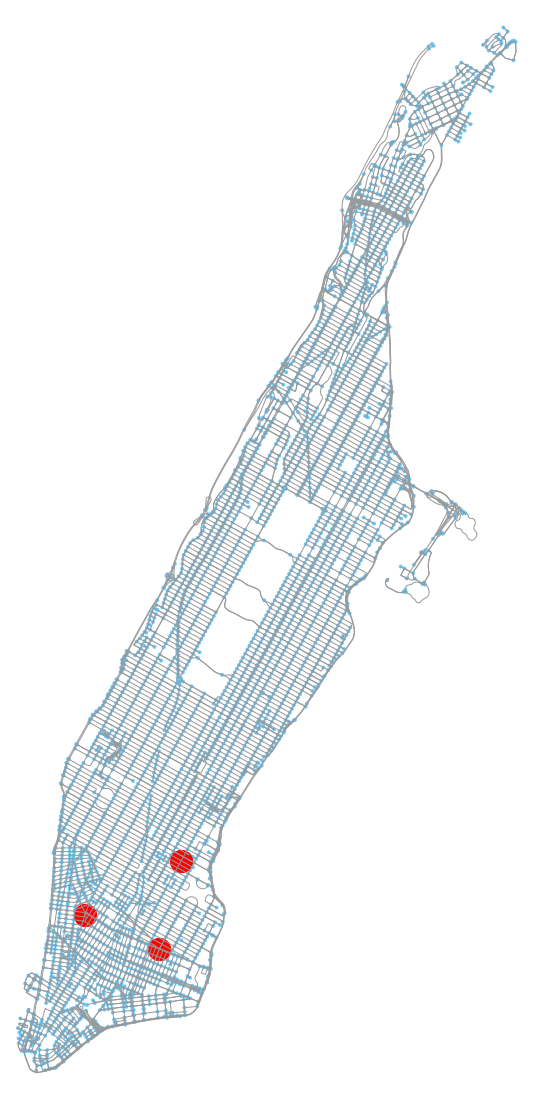

In [26]:
fig, ax = ox.plot_graph(G, fig_height=20, fig_width=20, show=False, close=False)
nodes, edges = ox.graph_to_gdfs(G)
def scatter_plot(x):
    node = nodes.loc[x.node_id]
    ax.scatter(node['x'], node['y'], c='r', s=500)
    
garage_locations.sort_values(by = ['score'], ascending=False)[:3].apply(scatter_plot, axis=1) 
plt.show()

# Task - level 2

Another way to choose garage locations is by leveraging the [betweenness centrality](https://en.wikipedia.org/wiki/Betweenness_centrality) of nodes in the map. Frameworks like networkx have simple techniques to compute this values for nodes in the graph. How do you think we can use betweenness centrality to identify garage areas?

Note: Ignore the suggested garage locations from above for this task

In [27]:
import heapq
from operator import itemgetter

#use the DiGraph G2 for all your computations
G2 = nx.DiGraph(G)

def get_garage_locations(G2):
    #Write garage locations
    dt = nx.betweenness_centrality(G2)
    topitems = heapq.nlargest(3, dt.items(), key=itemgetter(1))
    return list(map(list, zip(*topitems)))[0]

In [28]:
module.check_p2q2(get_garage_locations(G2))

'Correct!'